# 1. Import một số thư viện cần thiết

In [1]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

In [2]:
SAB = pd.read_csv("SAB.csv")

In [3]:
SAB

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,242000.0,236300.0,246000.0,236300.0,31.25K,0.83%
1,3/4/2019,242000.0,240000.0,245500.0,239000.0,44.09K,0.00%
2,3/5/2019,243500.0,244500.0,244800.0,240100.0,10.22K,0.62%
3,3/6/2019,243900.0,240400.0,245000.0,240000.0,22.91K,0.16%
4,3/7/2019,241100.0,242000.0,242900.0,240500.0,25.34K,-1.15%
...,...,...,...,...,...,...,...
1263,3/19/2024,56900.0,57300.0,57400.0,56600.0,654.60K,0.35%
1264,3/20/2024,56900.0,57000.0,57100.0,56400.0,739.80K,0.00%
1265,3/21/2024,57200.0,57400.0,57600.0,57100.0,738.10K,0.53%
1266,3/22/2024,57200.0,57300.0,57600.0,54800.0,673.90K,0.00%


# 2. Tiền xử lý dữ liệu

### Loại bỏ một số dữ liệu trống trong dataset

In [4]:
# Drop missing values
SAB = SAB.dropna()
# Reset the index
SAB = SAB.reset_index(drop=True)

### Chuyển dữ liệu cột Price sang dạng float

In [5]:
SAB["Price"]=SAB["Price"].astype(float)

# 3. Trực quan hóa tập dữ liệu ban đầu bằng biểu đồ

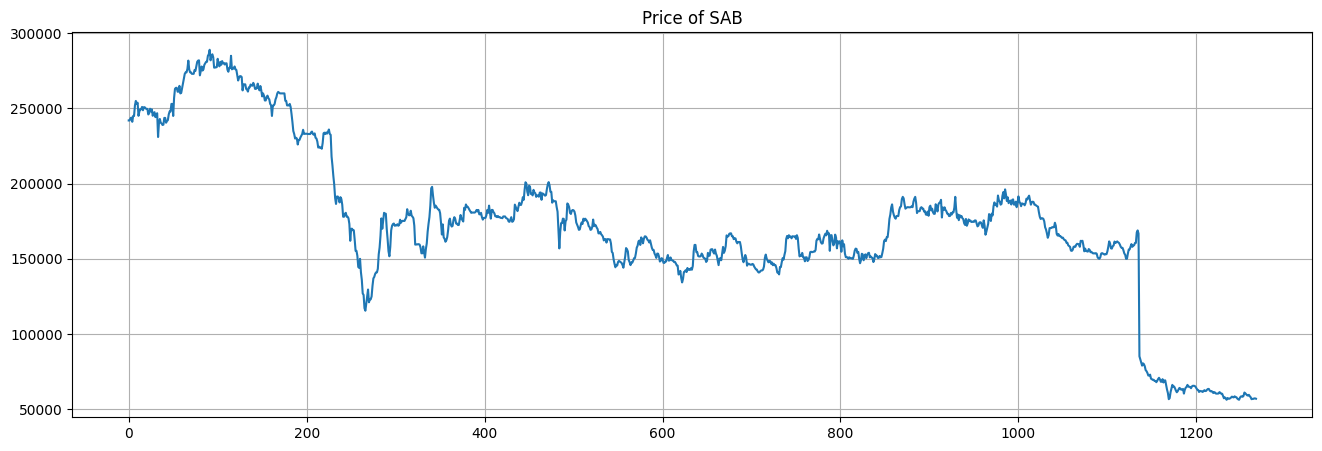

In [6]:
# Illustrated representation of Close Stock Price
plt.figure(figsize=(16,5))
plt.plot(SAB["Price"])
plt.title('Price of SAB')
plt.grid(True)
plt.show()

# 4. Chia tập dữ liệu để train-test-validate theo tỉ lệ 7:2:1

In [7]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(SAB))
test_size = int(0.2 * len(SAB))
val_size = len(SAB) - train_size - test_size

In [8]:
train_data = SAB[:train_size]
test_data = SAB[train_size:train_size+test_size]
val_data = SAB[train_size+test_size:]

<h1> Quá trình training

In [9]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1> Quá trình testing

In [10]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [11]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [12]:
#Tạo index cho 30 ngày tiếp theo
last_index =  SAB.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[80451.03603235 80320.24903219 80189.46203204 80058.67503188
 79927.88803173 79797.10103157 79666.31403141 79535.52703126
 79404.7400311  79273.95303094 79143.16603079 79012.37903063
 78881.59203048 78750.80503032 78620.01803016 78489.23103001
 78358.44402985 78227.6570297  78096.87002954 77966.08302938
 77835.29602923 77704.50902907 77573.72202891 77442.93502876
 77312.1480286  77181.36102845 77050.57402829 76919.78702813
 76789.00002798 76658.21302782]


<h1>Đánh giá độ chính xác của thuật toán

In [13]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 25927.727947835894
Testing RMSE: 58488.38500419316


In [14]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 25778.985042425553
Testing MAE: 57662.72128521659


In [15]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 41.235095723178325
Testing MAPE: 33.55763293374796


<h1>Vẽ hình mô tả dự đoán

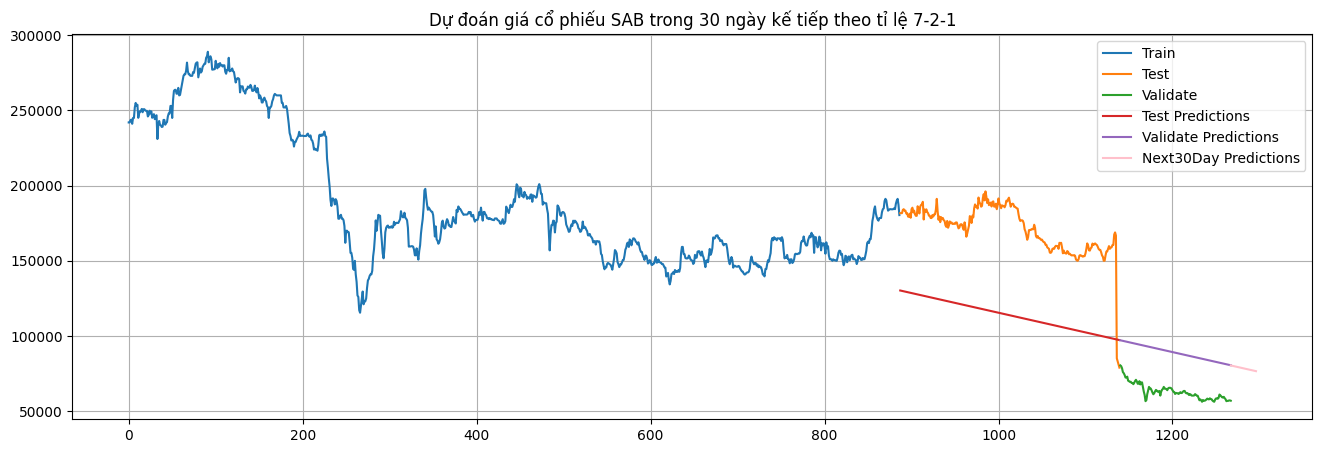

In [16]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu SAB trong 30 ngày kế tiếp theo tỉ lệ 7-2-1")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

# 5. Chia tập dữ liệu để train-test-validate theo tỉ lệ 6:3:1

In [17]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(SAB))
test_size = int(0.3 * len(SAB))
val_size = len(SAB) - train_size - test_size

In [18]:
train_data = SAB[:train_size]
test_data = SAB[train_size:train_size+test_size]
val_data = SAB[train_size+test_size:]

<h1>Quá trình training

In [19]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1>Quá trình testing

In [20]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [21]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [22]:
#Tạo index cho 30 ngày tiếp theo
last_index =  SAB.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[41292.56644747 41122.32204754 40952.0776476  40781.83324767
 40611.58884774 40441.3444478  40271.10004787 40100.85564793
 39930.611248   39760.36684806 39590.12244813 39419.87804819
 39249.63364826 39079.38924832 38909.14484839 38738.90044845
 38568.65604852 38398.41164858 38228.16724865 38057.92284871
 37887.67844878 37717.43404885 37547.18964891 37376.94524898
 37206.70084904 37036.45644911 36866.21204917 36695.96764924
 36525.7232493  36355.47884937]


<h1>Đánh giá độ chính xác của thuật toán

In [23]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 11328.20878715359
Testing RMSE: 76623.36168952587


In [24]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 10866.096001768827
Testing MAE: 72857.47638384344


In [25]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 17.365426369068715
Testing MAPE: 42.771486046658985


<h1>Vẽ hình mô tả dự đoán

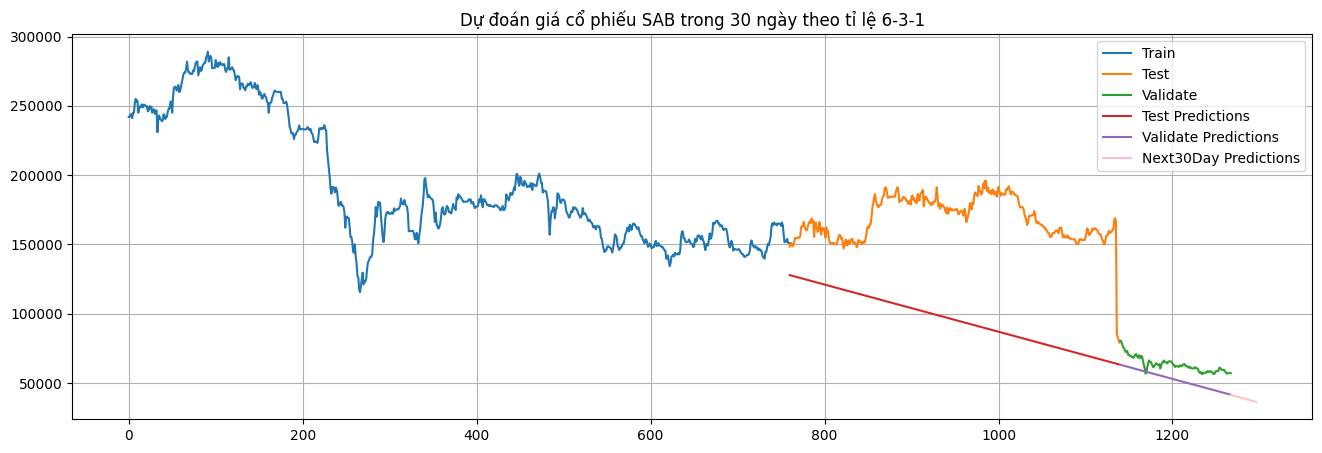

In [26]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.grid(True)
plt.title("Dự đoán giá cổ phiếu SAB trong 30 ngày theo tỉ lệ 6-3-1")
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color="pink")
plt.legend(['Train', 'Test','Validate', 'Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

# 6. Chia tập dữ liệu để train-test-validate theo tỉ lệ 5:3:2

In [27]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(SAB))
test_size = int(0.3 * len(SAB))
val_size = len(SAB) - train_size - test_size

In [28]:
train_data = SAB[:train_size]
test_data = SAB[train_size:train_size+test_size]
val_data = SAB[train_size+test_size:]

<h1> Quá trình training

In [29]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1> Quá trình testing

In [30]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [31]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [32]:
#Tạo index cho 30 ngày tiếp theo
last_index =  SAB.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[6155.33105662 5951.179123   5747.02718938 5542.87525575 5338.72332213
 5134.57138851 4930.41945488 4726.26752126 4522.11558764 4317.96365401
 4113.81172039 3909.65978677 3705.50785314 3501.35591952 3297.2039859
 3093.05205227 2888.90011865 2684.74818503 2480.5962514  2276.44431778
 2072.29238416 1868.14045054 1663.98851691 1459.83658329 1255.68464967
 1051.53271604  847.38078242  643.2288488   439.07691517  234.92498155]


<h1>Đánh giá độ chính xác của thuật toán

In [33]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 87104.76756112302
Testing RMSE: 77926.55630856594


In [34]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 78942.0690599695
Testing MAE: 69197.92918472811


In [35]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 70.78842723893311
Testing MAPE: 40.18239076831884


<h1>Vẽ hình mô tả dự đoán

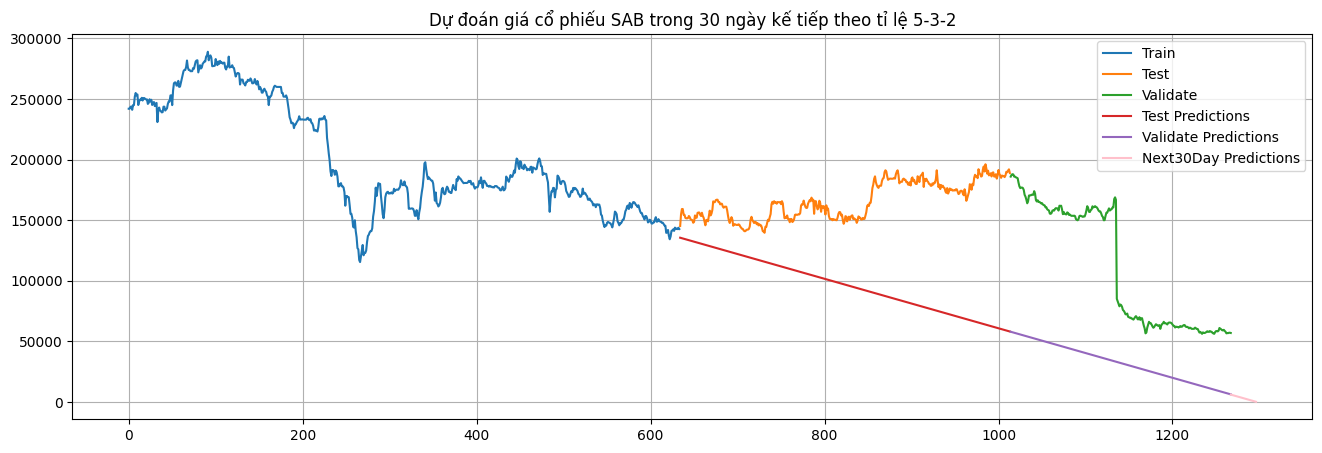

In [36]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu SAB trong 30 ngày kế tiếp theo tỉ lệ 5-3-2")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()